In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller




### Load Prices 

- loads all 3 dataframes and merges into one

In [42]:
def get_prices(round: int, day: int):

    path = f"../../data/round{round}/prices_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")


def get_trades(round: int, day: int):

    path = f"../../data/round{round}/trades_round_{round}_day_{day}.csv"
    return pd.read_csv(path, sep=";")

price_frames = []
trade_frames = []

for day in range(-2, -1):  

    prices = get_prices(1, day)
    trades = get_trades(1, day)
    price_frames.append(prices)
    trade_frames.append(trades)

all_prices = pd.concat(price_frames, ignore_index=True)
all_trades = pd.concat(trade_frames, ignore_index=True)
all_prices.head(5)



,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0


In [44]:
all_prices_squid_ink = all_prices[all_prices["product"] == "SQUID_INK"]
all_prices_kelp = all_prices[all_prices["product"] == "KELP"]
all_prices_resin = all_prices[all_prices["product"] == "RAINFOREST_RESIN"]



In [46]:
## Price paths on 3 different days 

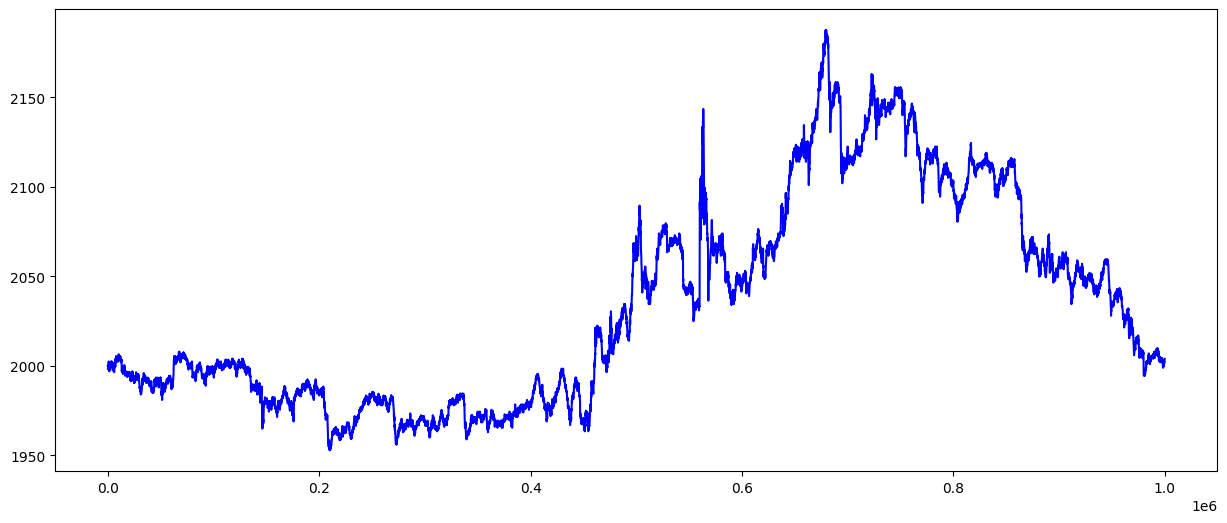

In [48]:
#Squid Ink
plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink['timestamp'], all_prices_squid_ink['mid_price'], label='Mid Price', color='blue')


In [90]:
window = 50  # adjust based on behavior
all_prices_squid_ink['mean'] = all_prices_squid_ink['mid_price'].rolling(window).mean()
all_prices_squid_ink['std'] = all_prices_squid_ink['mid_price'].rolling(window).std()
all_prices_squid_ink['z_score'] = (all_prices_squid_ink['mid_price'] - all_prices_squid_ink['mean']) / all_prices_squid_ink['std']

/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_57169/2367254472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_squid_ink['mean'] = all_prices_squid_ink['mid_price'].rolling(window).mean()
/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_57169/2367254472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_prices_squid_ink['std'] = all_prices_squid_ink['mid_price'].rolling(window).std()
/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_57169/2367254472.py:4: 

<Axes: >

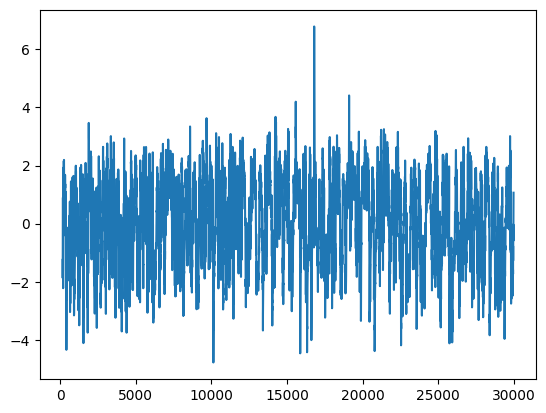

In [96]:
all_prices_squid_ink["z_score"].plot()

In [50]:
#For first hald it remains around 2000
#For the second half then it trends 

In [52]:
#Check for stationarity (ADF test)

In [55]:
## Splitting the two regimes 

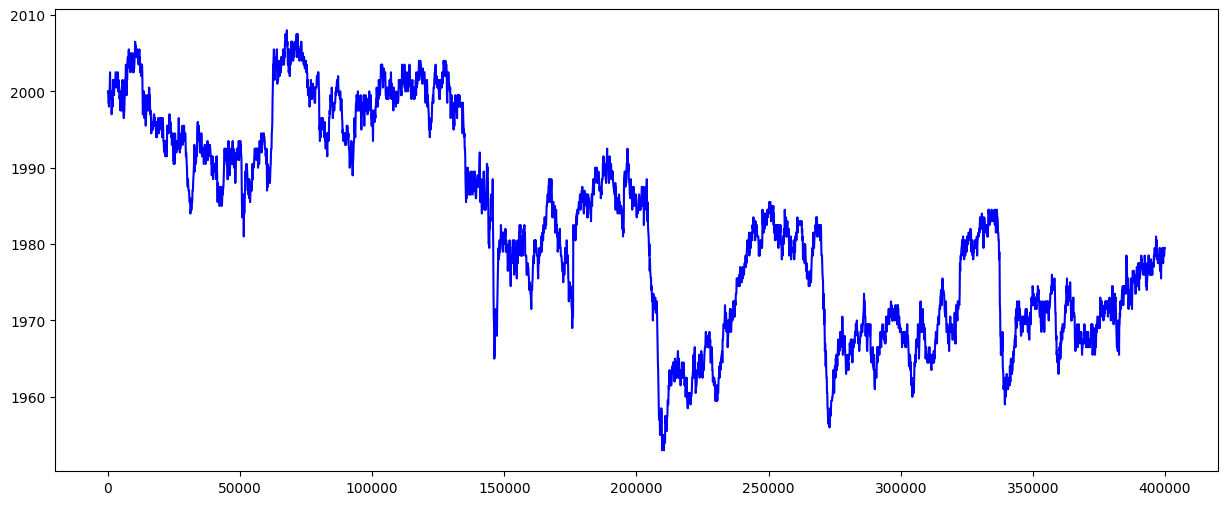

In [57]:
all_prices_squid_ink_one = all_prices[(all_prices["product"] == "SQUID_INK") & (all_prices["timestamp"] < 400000)]

plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink_one['timestamp'], all_prices_squid_ink_one['mid_price'], label='Mid Price', color='blue')


In [59]:
all_prices_squid_ink_one["mid_price"]

2        2000.0
3        2000.0
7        1998.5
11       1998.5
14       1998.0
          ...  
11985    1979.5
11990    1978.5
11993    1978.5
11996    1979.5
11997    1979.5
Name: mid_price, Length: 4000, dtype: float64

In [61]:


# Example: assume `df` is your price DataFrame with a 'price' column
df['mean'] = df['price'].rolling(window=50).mean()

NameError: name 'df' is not defined

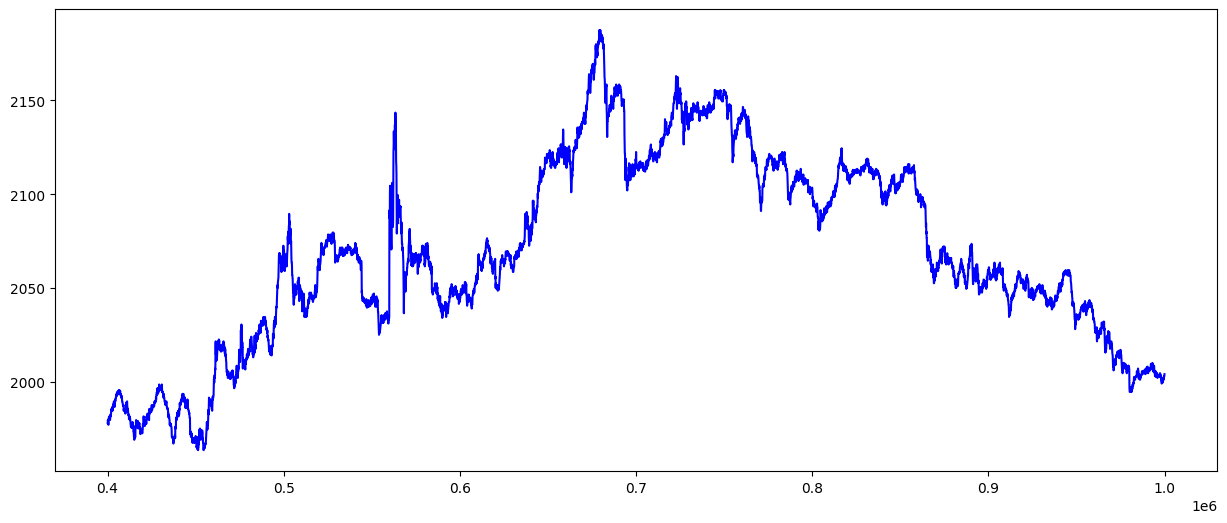

In [65]:
all_prices_squid_ink_two = all_prices[(all_prices["product"] == "SQUID_INK") & (all_prices["timestamp"] > 400000)]

plt.figure(figsize=(15, 6)) 
plt.plot(all_prices_squid_ink_two['timestamp'], all_prices_squid_ink_two['mid_price'], label='Mid Price', color='blue')